In [1]:
%cd /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5 

/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/CDHU-katrin_youtube_dalia/yolov5


In [2]:
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
def rename_df_cols(df):
    old_cols = list(df.columns)
    new_cols = ['epoch', 'train/box_loss', 'train/obj_loss',
       'train/cls_loss', 'metrics/precision', 'metrics/recall',
       'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss',
       'val/obj_loss', 'val/cls_loss', '/lr0', 'x/lr1', 'x/lr2']
    aux = dict(zip(old_cols, new_cols))
    df = df.rename(columns=aux)
    return df

def plot_losses(df_results):
    df_results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Cls_loss")
    #plt.show()

## Training dataset preparation

In [4]:
!cat /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml

train: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/train
val: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/val
test: /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/images/test

nc: 2

names: ['s_svd', 's_soc']

In [5]:
data_path = '/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml'

## Model training: base model

In [6]:
model_name = 'base_two_clases_b16_e150_f12'

In [ ]:
#!python train.py --batch 16 \
#--epochs 150 \
#--data {data_path} \
#--weights yolov5s6.pt \
#--cache \
#--freeze 12 \
#--project Sverige \
#--name {model_name}

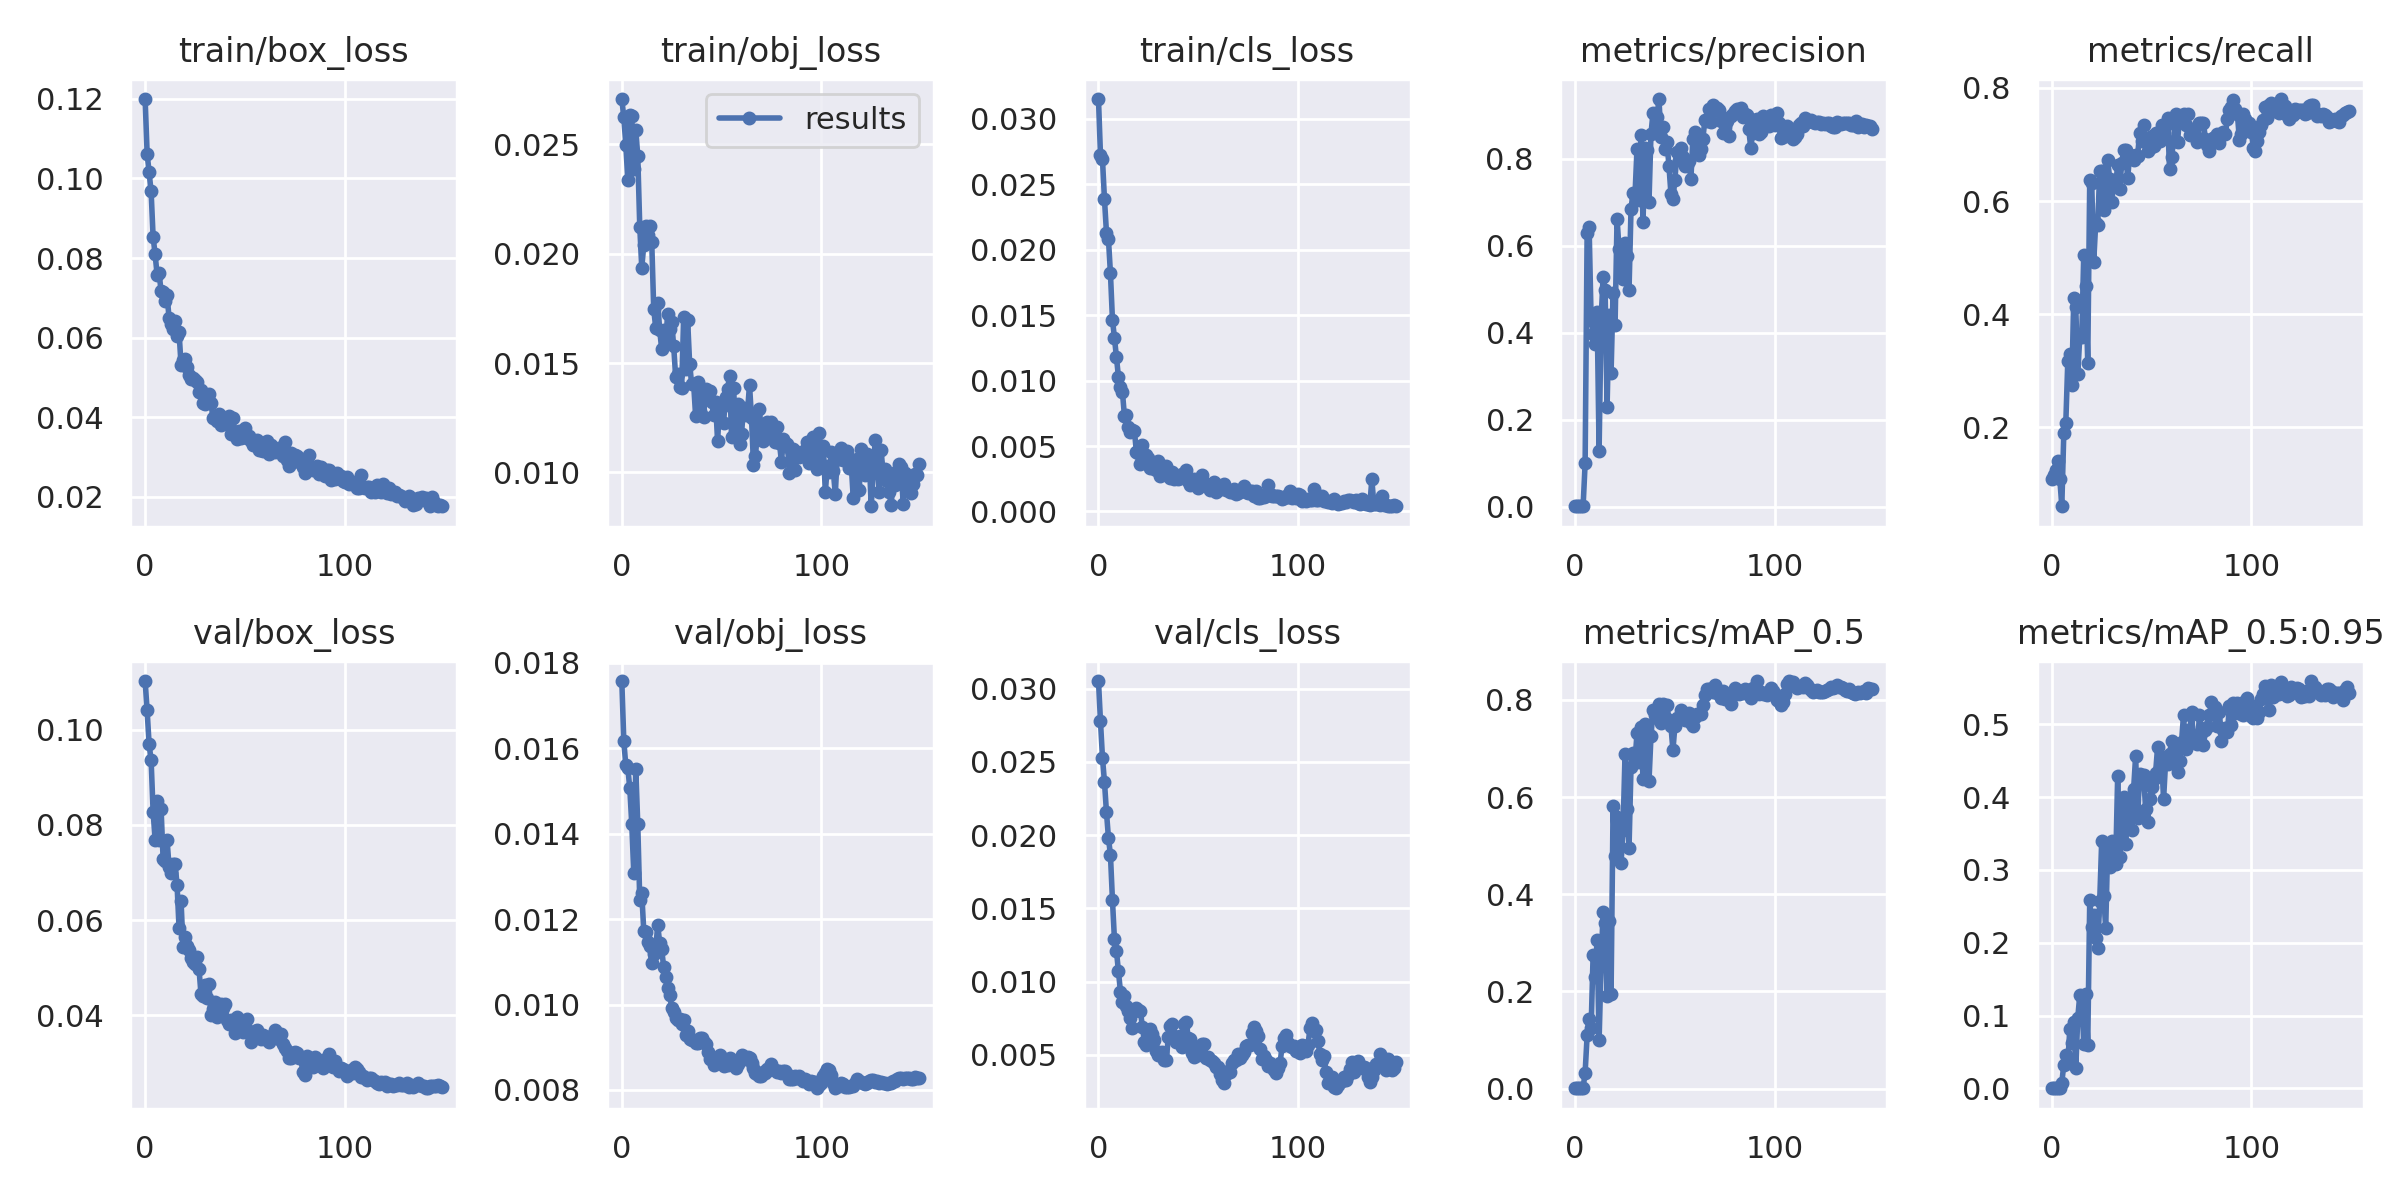

In [7]:
display.Image(f"Sverige/base_two_clases_b16_e150_f122/results.png")

### Results evaluation

In [8]:
results_csv_path = 'Sverige/base_two_clases_b16_e150_f122/results.csv'
results = rename_df_cols(pd.read_csv(results_csv_path))
results.columns

Index(['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss',
       'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5',
       'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss',
       '/lr0', 'x/lr1', 'x/lr2'],
      dtype='object')

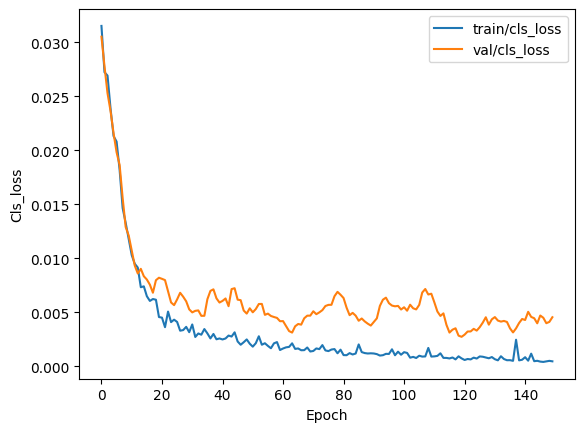

In [9]:
# PLot
plot_losses(results)
plt.show()

### Base model training: learning rate 0.001

In [ ]:
model_name = 'baseFT2_two_clases_b16_e150_f12'
hyper_path = 'Sverige/hyp.swedish_finetune_2.yaml'

In [ ]:
'''!python train.py --batch 16 \
--epochs 150 \
--data {data_path} \
--hyp {hyper_path}\
--weights yolov5s6.pt \
--cache \
--freeze 12 \
--project Sverige \
--name {model_name}'''

### model_name = 'base_two_clases_b32_e150_f12'

In [10]:
model_name = 'base_two_clases_b32_e150_f12'

#!python train.py --batch 32 \
#--epochs 150 \
#--data {data_path} \
#--weights yolov5s6.pt \
#--cache \
#--freeze 12 \
#--project Sverige \
#--name {model_name}

In [11]:
# Read results
model_name = 'base_two_clases_b32_e150_f12'
results_b32_csv_path = f'Sverige/{model_name}/results.csv'
results_b32 = rename_df_cols(pd.read_csv(results_b32_csv_path))
# PLot
#plot_losses(results_b32)

### model_name = 'base_two_clases_b64_e150_f12'

In [ ]:
model_name = 'base_two_clases_b64_e150_f12'

#!python train.py --batch 64 \
#--epochs 150 \
#--data {data_path} \
#--weights yolov5s6.pt \
#--cache \
#--freeze 12 \
#--project Sverige \
#--name {model_name}

In [13]:
# Read results
model_name = 'base_two_clases_b64_e150_f12'
results_b64_csv_path = f'Sverige/{model_name}/results.csv'
results_b64 = rename_df_cols(pd.read_csv(results_b64_csv_path))
# PLot
#plot_losses(results_b64)

### Plot: batch size comparision 

Text(0.5, 1.0, 'base_two_clases_b64_e150_f12')

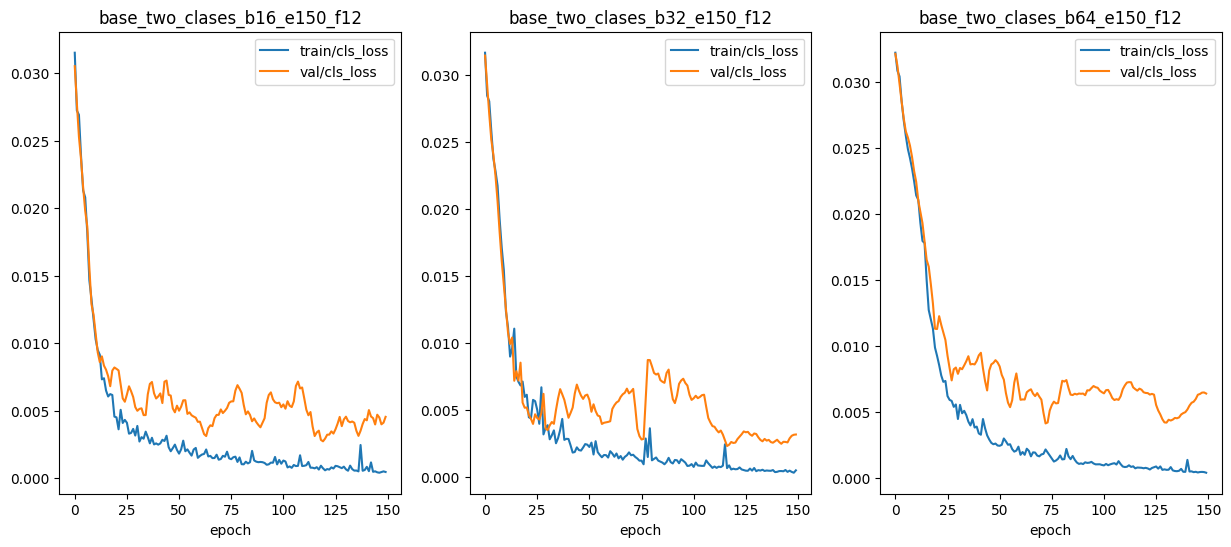

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
# base_two_clases_b16_e150_f122
results.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# base_two_clases_b64_e150_f122
results_b64.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])

# Set individual title 
axes[0].set_title('base_two_clases_b16_e150_f12')
axes[1].set_title('base_two_clases_b32_e150_f12')
axes[2].set_title('base_two_clases_b64_e150_f12')

# Set common labels
#fig.supxlabel('fig.supxlabel')
#fig.supylabel('fig.supylabel')

## Fine tune: learning rate 

In [48]:
import yaml

def modify_lr_hyperparam(hyperparam_file_path:str, lr_new:float):
    with open(hyperparam_file_path, 'r') as f:
        yaml_dict = yaml.safe_load(f)
        
        # Modify the 'lr' value in the sixth line
        yaml_dict['lr0'] = lr_new
        #print(yaml_dict['lr0'])
        
    # Write the modified YAML back to the file
    with open(hyperparam_file_path, 'w') as f:
        yaml.dump(yaml_dict, f)

#### Freezing batch size to 32

In [50]:
# Set batch size 

batch_s = 32
lr_list = [0.1, 0.001, 0.0001] # 0.01 is already done
hyper_path = 'Sverige/hyp.swedish_finetune_2.yaml'

for lr in lr_list:
    # Give a name to the model
    model_name = f'lr{lr}_b32_e150_f12'
    print(f'**************TRAINING MODEL {model_name}*********')
    
    # Modify the hyperparamets file
    modify_lr_hyperparam(hyper_path, lr)
    
    !python train.py --batch {batch_s} \
    --epochs 150 \
    --data {data_path} \
    --hyp {hyper_path}\
    --weights yolov5s6.pt \
    --cache \
    --freeze 12 \
    --project Sverige \
    --name {model_name}

**************TRAINING MODEL lr0.1_b32_e150_f12*********
train: weights=yolov5s6.pt, cfg=, data=/zpool/beast-mirror/labour-movements-mobilisation-via-visual-means/datasets/Sverige/sverige_paths.yaml, hyp=Sverige/hyp.swedish_finetune_2.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=Sverige, name=lr0.1_b32_e150_f12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 13 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.10.8 torch-2.0.0+cu117 CUDA:0 (Quadro RTX 5000, 16125MiB)

hyperparameters: anchor_

  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 326.80
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 72.12it/s]

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.1_b32_e150_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Sverige/lr0.1_b32_e150_f12
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/149      1.47G     0.1167    0.02714     0.0308         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121    0.00231     0.

     22/149      2.74G    0.08758    0.01888   0.005202         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.573      0.293     0.0948     0.0225

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/149      2.74G    0.08417     0.0165   0.006397         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.551      0.336      0.138     0.0289

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/149      2.74G    0.08118     0.0155   0.005808         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.111      0.306      0.115      0.039

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     25/14

     47/149      2.74G    0.04952    0.01659    0.00211         37        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.785      0.726      0.759      0.397

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/149      2.74G    0.05248    0.01253   0.002084         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.788      0.703      0.767      0.428

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/149      2.74G    0.05059    0.01285   0.002161         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.733      0.677      0.705      0.322

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/14

     72/149      2.74G    0.03629    0.01185   0.001211         24        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.833      0.745      0.816      0.483

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/149      2.74G    0.03914    0.01139   0.001061         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.769       0.77      0.805      0.473

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/149      2.74G    0.03911    0.01338   0.001172         42        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.853      0.738      0.819      0.515

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/14

     97/149      2.74G    0.02815    0.01071  0.0008923         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.819      0.791      0.843      0.512

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/149      2.74G    0.02852      0.011  0.0007356         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.869      0.754      0.835      0.529

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/149      2.74G    0.03005    0.01129   0.001138         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.876      0.762      0.836      0.517

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/14

    122/149      2.74G    0.02632    0.00955  0.0005443         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.847      0.786      0.848       0.55

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/149      2.74G    0.02568   0.008726   0.000398         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.839      0.785      0.841      0.539

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/149      2.74G    0.02653    0.01077  0.0006348         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.836      0.789      0.842      0.538

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/14

    147/149      2.74G    0.02208   0.009791  0.0003811         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.804      0.825      0.847      0.554

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/149      2.74G    0.01928   0.008448  0.0002352         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.801      0.835      0.846      0.555

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/149      2.74G    0.02293   0.009986  0.0004406         58        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.801       0.84      0.846      0.553

150 epochs completed in 0.086 hours.
Optimizer stripped from Sverige/lr0.1_b32_e150_f12/

  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 324.40
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 87.30it/s]

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.001_b32_e150_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Sverige/lr0.001_b32_e150_f12
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      0/149      1.47G     0.1206    0.02745    0.03176         28        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   0.000786   

     22/149      2.74G    0.07129    0.02576    0.01817         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0114     0.0835    0.00681    0.00267

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/149      2.74G    0.06823    0.02567    0.01793         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0213      0.119     0.0136    0.00487

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/149      2.74G    0.06975    0.02406    0.01842         29        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.148     0.0517     0.0504     0.0154

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     25/14

     47/149      2.74G    0.04783    0.02349   0.004938         37        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.554      0.437       0.44      0.224

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/149      2.74G    0.04727    0.01897   0.005421         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.588      0.437      0.444      0.224

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/149      2.74G    0.04372     0.0198   0.006122         17        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.655      0.428      0.453      0.231

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     50/14

     72/149      2.74G    0.03673    0.01774   0.002978         24        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.656      0.577      0.583      0.313

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/149      2.74G    0.03912    0.01723   0.002884         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.665      0.582       0.59      0.318

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/149      2.74G    0.04037    0.02043    0.00357         42        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.693      0.602      0.593      0.324

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     75/14

     97/149      2.74G     0.0329    0.01642   0.002365         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.808        0.6      0.659      0.388

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/149      2.74G    0.03402    0.01718   0.001908         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.829      0.585      0.661      0.383

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/149      2.74G    0.03495    0.01793   0.003184         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.823      0.593      0.666      0.391

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    100/14

    122/149      2.74G    0.03186    0.01511   0.002093         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.857      0.624      0.697      0.407

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/149      2.74G    0.03247      0.014   0.001926         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.846      0.624      0.703      0.398

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/149      2.74G    0.03439    0.01843   0.002191         26        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.863      0.626      0.702      0.415

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    125/14

    147/149      2.74G    0.03087    0.01629   0.002079         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.875      0.638      0.705      0.431

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/149      2.74G    0.03027    0.01468   0.001641         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.852      0.634      0.705       0.43

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/149      2.74G    0.03312    0.01734   0.002567         58        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121      0.868       0.64      0.706      0.424

150 epochs completed in 0.087 hours.
Optimizer stripped from Sverige/lr0.001_b32_e150_f1

WARNING ⚠️ DP not recommended, use torch.distributed.run for best DDP Multi-GPU results.
See Multi-GPU Tutorial at https://github.com/ultralytics/yolov5/issues/475 to get started.
train: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-mea
  0%|          | 0/166 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
train: Caching images (0.1GB ram): 100%|██████████| 166/166 [00:00<00:00, 326.52
val: Scanning /zpool/beast-mirror/labour-movements-mobilisation-via-visual-means
libpng warning: iCCP: known incorrect sRGB profile
val: Caching images (0.0GB ram): 100%|██████████| 46/46 [00:00<00:00, 85.97it/s]

AutoAnchor: 4.10 anchors/target, 0.998 Best Possible Recall (BPR). Current anchors are a good fit to dataset ✅
Plotting labels to Sverige/lr0.0001_b32_e150_f12/labels.jpg... 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Sverige/lr0.0001_b32_e150_f12
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss  

     21/149      2.74G     0.1025    0.02445    0.02705         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   0.000717     0.0835   0.000622   0.000216

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     22/149      2.74G     0.1023    0.02173    0.02658         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   0.000799     0.0914   0.000655   0.000227

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     23/149      2.74G    0.09914    0.02213    0.02662         20        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   0.000732     0.0828   0.000596   0.000212

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     24/14

     46/149      2.74G    0.08493    0.02334     0.0233         13        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   0.000948      0.107   0.000763   0.000329

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     47/149      2.74G    0.08821    0.02626    0.02361         37        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   0.000879     0.0987   0.000742   0.000326

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     48/149      2.74G    0.08706    0.02211    0.02305         23        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121   0.000954      0.107   0.000795   0.000307

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     49/14

     71/149      2.74G    0.08028    0.02497     0.0222         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121    0.00346     0.0166    0.00168   0.000746

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     72/149      2.74G    0.07621    0.02605    0.02136         24        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121    0.00484     0.0166    0.00179   0.000801

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     73/149      2.74G    0.07857    0.02367    0.02174         12        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0038     0.0166    0.00168   0.000752

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     74/14

     96/149      2.74G    0.07294    0.02572    0.01982         30        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0241     0.0166     0.0027    0.00148

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     97/149      2.74G    0.07131    0.02404    0.01897         15        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0259     0.0166    0.00282    0.00154

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     98/149      2.74G    0.07381    0.02614    0.01924         27        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0213     0.0166    0.00283     0.0014

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
     99/14

    121/149      2.74G    0.07277    0.02685    0.01906         32        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0246    0.00862    0.00359    0.00172

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    122/149      2.74G    0.07153    0.02356    0.01977         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0468     0.0145    0.00359    0.00174

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    123/149      2.74G    0.07173    0.02243    0.01842         18        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0442     0.0166    0.00358    0.00173

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    124/14

    146/149      2.74G    0.07274    0.02643    0.01884         34        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0372    0.00862    0.00479    0.00262

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    147/149      2.74G    0.07007    0.02474    0.01934         25        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0346    0.00862    0.00467    0.00255

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    148/149      2.74G    0.06758    0.02423     0.0183         16        640: 1
                 Class     Images  Instances          P          R      mAP50   
                   all         46        121     0.0351    0.00862     0.0048    0.00258

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
    149/14

In [ ]:
# Read results
model_name = 'lr0.1_b32_e150_f12'
results_b32_lr1_csv_path = f'Sverige/{model_name}/results.csv'
results_b32_lr1 = rename_df_cols(pd.read_csv(results_b32_lr1_csv_path))

model_name = 'lr0.001_b32_e150_f12'
results_b32_lr001_csv_path = f'Sverige/{model_name}/results.csv'
results_b32_lr001 = rename_df_cols(pd.read_csv(results_b32_lr001_csv_path))

model_name = 'lr0.0001_b32_e150_f12'
results_b32_lr0001_csv_path = f'Sverige/{model_name}/results.csv'
results_b32_lr0001 = rename_df_cols(pd.read_csv(results_b32_lr0001_csv_path))

Text(0.5, 1.0, 'lr0.0001_b32_e150_f12')

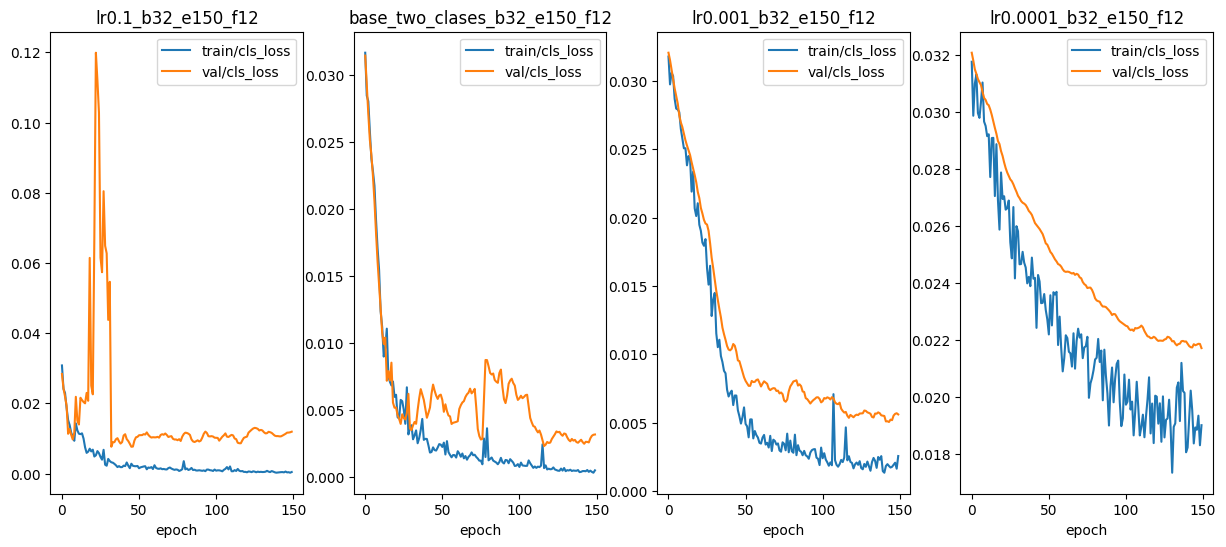

In [52]:
# Plots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))
# lr0.1_b32_e150_f12
results_b32_lr1.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[0]) 
# base_two_clases_b32_e150_f122
results_b32.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[1])
# lr0.001_b32_e150_f12
results_b32_lr001.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[2])
# lr0.001_b32_e150_f12
results_b32_lr0001.plot(x='epoch', y=['train/cls_loss', 'val/cls_loss'], ax=axes[3])


# Set individual title 
axes[0].set_title('lr0.1_b32_e150_f12')
axes[1].set_title('base_two_clases_b32_e150_f12')
axes[2].set_title('lr0.001_b32_e150_f12')
axes[3].set_title('lr0.0001_b32_e150_f12')